# Image Pre-processing using skimage & scipy

### Resize and Rescale Images

In [1]:
#Resize, rescale

import matplotlib.pyplot as plt

from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean

img = io.imread("images/test_image.jpg", as_gray=True) #as_gray convert image into float

print(img)

print("\nOriginal Image Shape: ",img.shape)

[[0.18750902 0.29653647 0.3717851  ... 0.         0.         0.        ]
 [0.20315843 0.28747216 0.32489608 ... 0.         0.         0.        ]
 [0.14917725 0.22310235 0.25550353 ... 0.         0.         0.        ]
 ...
 [0.07379098 0.06509176 0.05976353 ... 0.0723898  0.02890235 0.00981529]
 [0.12850902 0.11139333 0.09512588 ... 0.13209922 0.06898118 0.02577647]
 [0.19078745 0.15572275 0.10549961 ... 0.16837725 0.11141647 0.04026353]]

Original Image Shape:  (513, 639)


`rescale()` :  resize image by a given factor. 

While rescaling image, gaussian smoothing can performed to avoid anti aliasing artifacts.

In [2]:
img_rescaled = rescale(img, 1.0 / 4.0, anti_aliasing=False)
img_rescaled.shape #Check rescales image size

(128, 160)

In [3]:
#Resize, resize image to given dimensions (shape)
img_resized = resize(img, (200, 200),           
                       anti_aliasing=True)

img_resized.shape #Check dimensions

(200, 200)

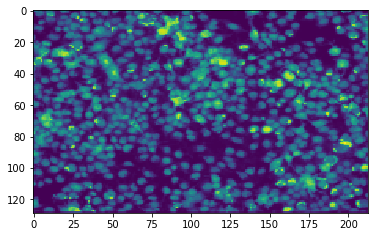

In [4]:
#Downscale, downsample using local mean of elements of each block defined by user
img_downscaled = downscale_local_mean(img, (4, 3))
plt.imshow(img_downscaled)

---

### Coverting Image Data Type

In [5]:
from skimage import io
img = io.imread("images/monkey.jpg")
print(type(img))  #numpy array

<class 'numpy.ndarray'>


`img_as_ubyte()` converts image to 8 bit unsigned int

(Refer `02_Image_Data_Types.ipynb` to recall about data types such as `uint8` i.e., 8 bit unsigned integer)

In [6]:
from skimage import io, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

img = img_as_ubyte(io.imread("images/monkey.jpg", as_gray=True)) #img_as_ubyte converts image to uint8

In [7]:
print(type(img))
print(img.shape, img.dtype)
#plt.imshow(img) 

<class 'numpy.ndarray'>
(330, 220) uint8


### Obtain value of selected pixel 

In [8]:
#individual pixel values
print(img[0,0])   #reports pixel value at 0,0. 

63


**DIY :** Remove `img_as_ubyte` and see the value. Also make `as_grey = True` and see the above values

### Pixel values of a part of image

In [9]:
#pixel values from a slice
print(img[10:15, 20:25])  #Values from a slice

[[69 70 72 73 74]
 [70 71 73 75 75]
 [71 72 75 76 75]
 [71 73 76 78 76]
 [72 74 77 79 77]]


### Image Stats

133.4420385674931 3 255


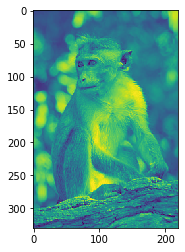

In [10]:
mean_grey = img.mean()
max_value = img.max()
min_value = img.min()
print(mean_grey, min_value, max_value)
plt.imshow(img)

### Image Flip

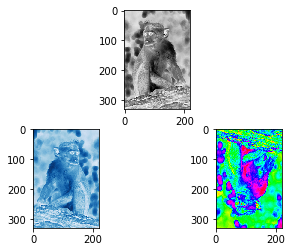

In [11]:
#geometric transformation
#flipped

flipped_img_LR = np.fliplr(img)
flipped_img_UD = np.flipud(img)

plt.subplot(2,1,1)
plt.imshow(img, cmap="Greys")
plt.subplot(2,2,3)
plt.imshow(flipped_img_LR, cmap="Blues")
plt.subplot(2,2,4)
plt.imshow(flipped_img_UD, cmap="hsv")

For knowing all other options visit: https://matplotlib.org/tutorials/colors/colormaps.html

### Image Rotation

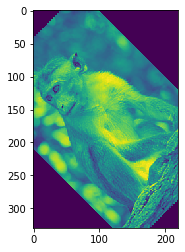

In [12]:
#Rotation
rotated_img = ndimage.rotate(img, 45)
plt.imshow(rotated_img)
rotated_img_noreshape = ndimage.rotate(img, 45, reshape=False)
plt.imshow(rotated_img_noreshape)